In [ ]:
const plantuml = require('plantuml');
const tslab = require("tslab");

## Howto offer VC to Holder

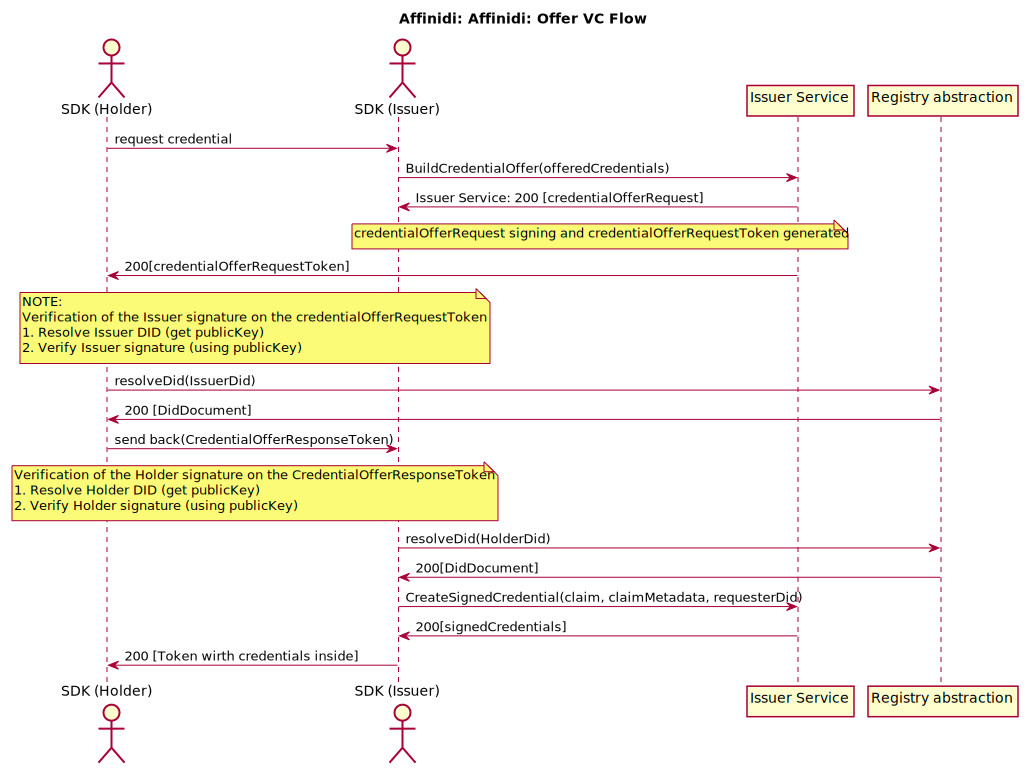

In [11]:
const ShareOfferDiagram = await plantuml(`
@startuml
title Affinidi: Affinidi: Offer VC Flow
actor "SDK (Holder)" as holder
actor  "SDK (Issuer)" as client
participant  "Issuer Service" as issuer
participant "Registry abstraction" as registry
holder -> client: request credential
client -> issuer: BuildCredentialOffer(offeredCredentials)
issuer -> client : Issuer Service: 200 [credentialOfferRequest]
note over client, issuer: credentialOfferRequest signing and credentialOfferRequestToken generated
issuer -> holder: 200[credentialOfferRequestToken]

note over holder, client
NOTE:
Verification of the Issuer signature on the credentialOfferRequestToken
1. Resolve Issuer DID (get publicKey)
2. Verify Issuer signature (using publicKey)
end note 
holder -> registry: resolveDid(IssuerDid)
registry -> holder: 200 [DidDocument]
holder -> client: send back(CredentialOfferResponseToken)

note over client, holder
Verification of the Holder signature on the CredentialOfferResponseToken
1. Resolve Holder DID (get publicKey)
2. Verify Holder signature (using publicKey)
end note
client -> registry: resolveDid(HolderDid)
registry -> client: 200[DidDocument]
client -> issuer: CreateSignedCredential(claim, claimMetadata, requesterDid)
issuer -> client: 200[signedCredentials]
client -> holder: 200 [Token wirth credentials inside]

@enduml
`);
tslab.display.svg(ShareOfferDiagram)


In [1]:
const { createWallet } = require('@affinidi/wallet-node-sdk')
const walletFactory = createWallet('AffinityCore')


Lets setup wallets

In [5]:
import jwt_decode from "jwt-decode";

In [2]:
const accessApiKey = '3794c3f8d9fb9a92770d79dbd5e490bc22bb0e58e9ff42475b379e35a575d13d'
const options = {
    env: 'prod',
    accessApiKey,
}
  const issuerWallet = await walletFactory.createWallet(options, 'P@55word!!!')
  const holderWallet = await walletFactory.createWallet(options, 'P@55word!!!')

What we want to offer

In [3]:
    const offeredCredentials = [
      {
        type: 'ContentLike',
        renderInfo:{},
      }]
     const callbackUrl = 'https://vp-service.com/callback'
     const credentialOfferRequestToken = await issuerWallet.generateCredentialOfferRequestToken(
      offeredCredentials,
      {
        callbackUrl,
      },
    )
     credentialOfferRequestToken

eyJ0eXAiOiJKV1QiLCJhbGciOiJFUzI1NksifQ.eyJpbnRlcmFjdGlvblRva2VuIjp7ImNhbGxiYWNrVVJMIjoiaHR0cHM6Ly92cC1zZXJ2aWNlLmNvbS9jYWxsYmFjayIsIm9mZmVyZWRDcmVkZW50aWFscyI6W3sidHlwZSI6IkNvbnRlbnRMaWtlIiwicmVuZGVySW5mbyI6e319XX0sImV4cCI6MTY2MjgzNzg5OTQ0NSwidHlwIjoiY3JlZGVudGlhbE9mZmVyUmVxdWVzdCIsImp0aSI6IjNmYTdhN2FkMTFiNWQ0YWMiLCJpc3MiOiJkaWQ6ZWxlbTpFaURVYldBUXNYOVk1S21aOVloYlJ1N0NyNGp5Y2k0WnVmdmVCM0FDUVlONzdBO2VsZW06aW5pdGlhbC1zdGF0ZT1leUp3Y205MFpXTjBaV1FpT2lKbGVVcDJZMGRXZVZsWVVuQmlNalJwVDJsS2FtTnRWbWhrUjFWcFRFTktjbUZYVVdsUGFVbHFZMGhLY0dKWFJubGxVMGx6U1cxR2MxcDVTVFpKYTFaVVRXcFZNbE41U2praUxDSndZWGxzYjJGa0lqb2laWGxLUVZreU9YVmtSMVkwWkVOSk5rbHRhREJrU0VKNlQyazRkbVI2VG5CYVF6VjJZMjFqZG1NeVZtcGtXRXB3WkVocmRtUnFTV2xNUTBwM1pGZEtjMkZYVGt4YVdHdHBUMngwTjBsdGJHdEphbTlwU1ROQ2VXRlhNV2hqYm10cFRFTktNV015Um01YVUwazJTVzVPY0ZveU5YQmliV05wVEVOS01HVllRbXhKYW05cFZUSldhbU5FU1RGT2JYTjRWbTFXZVdGWFduQlpNa1l3WVZjNWRWTXlWalZOYWtGNFQwTkpjMGx1UWpGWmJYaHdXVEIwYkdWVmFHeGxRMGsyU1dwQmVVMUVXWHBPVkdjeFRrZFpNbGxxWkd4UFZGRXlUakpGTlUxWFJUR

In [6]:
jwt_decode(credentialOfferRequestToken)

{
  interactionToken: {
    callbackURL: 'https://vp-service.com/callback',
    offeredCredentials: [ [Object] ]
  },
  exp: 1662837899445,
  typ: 'credentialOfferRequest',
  jti: '3fa7a7ad11b5d4ac',
  iss: 'did:elem:EiDUbWAQsX9Y5KmZ9YhbRu7Cr4jyci4ZufveB3ACQYN77A;elem:initial-state=eyJwcm90ZWN0ZWQiOiJleUp2Y0dWeVlYUnBiMjRpT2lKamNtVmhkR1VpTENKcmFXUWlPaUlqY0hKcGJXRnllU0lzSW1Gc1p5STZJa1ZUTWpVMlN5SjkiLCJwYXlsb2FkIjoiZXlKQVkyOXVkR1Y0ZENJNkltaDBkSEJ6T2k4dmR6TnBaQzV2Y21jdmMyVmpkWEpwZEhrdmRqSWlMQ0p3ZFdKc2FXTkxaWGtpT2x0N0ltbGtJam9pSTNCeWFXMWhjbmtpTENKMWMyRm5aU0k2SW5OcFoyNXBibWNpTENKMGVYQmxJam9pVTJWamNESTFObXN4Vm1WeWFXWnBZMkYwYVc5dVMyVjVNakF4T0NJc0luQjFZbXhwWTB0bGVVaGxlQ0k2SWpBeU1EWXpOVGcxTkdZMllqZGxPVFEyTjJFNU1XRTFZelEzT0dVM05XRmtabUV3WlRnd1ptWmhNVFl6TkRnd1lXWmlPRFU1TXpjNE5qbG1OVFV6TVRSaE15SjlMSHNpYVdRaU9pSWpjbVZqYjNabGNua2lMQ0oxYzJGblpTSTZJbkpsWTI5MlpYSjVJaXdpZEhsd1pTSTZJbE5sWTNBeU5UWnJNVlpsY21sbWFXTmhkR2x2Ymt0bGVUSXdNVGdpTENKd2RXSnNhV05MWlhsSVpYZ2lPaUl3TW1FNU9HWXdOamd5WXpVd1pXWmhZems1TnpreE5ES

Lets holder to send responce 

In [20]:
    const credentialOfferResponseToken = await holderWallet.createCredentialOfferResponseToken(
      credentialOfferRequestToken,
    )
    credentialOfferResponseToken

eyJ0eXAiOiJKV1QiLCJhbGciOiJFUzI1NksifQ.eyJpbnRlcmFjdGlvblRva2VuIjp7ImNhbGxiYWNrVVJMIjoiaHR0cHM6Ly92cC1zZXJ2aWNlLmNvbS9jYWxsYmFjayIsInNlbGVjdGVkQ3JlZGVudGlhbHMiOlt7InR5cGUiOiJDb250ZW50TGlrZSIsInJlbmRlckluZm8iOnt9fV19LCJleHAiOjE2NjI4MzkyMjk2NjcsInR5cCI6ImNyZWRlbnRpYWxPZmZlclJlc3BvbnNlIiwianRpIjoiM2ZhN2E3YWQxMWI1ZDRhYyIsImF1ZCI6ImRpZDplbGVtOkVpRFViV0FRc1g5WTVLbVo5WWhiUnU3Q3I0anljaTRadWZ2ZUIzQUNRWU43N0E7ZWxlbTppbml0aWFsLXN0YXRlPWV5SndjbTkwWldOMFpXUWlPaUpsZVVwMlkwZFdlVmxZVW5CaU1qUnBUMmxLYW1OdFZtaGtSMVZwVEVOS2NtRlhVV2xQYVVscVkwaEtjR0pYUm5sbFUwbHpTVzFHYzFwNVNUWkphMVpVVFdwVk1sTjVTamtpTENKd1lYbHNiMkZrSWpvaVpYbEtRVmt5T1hWa1IxWTBaRU5KTmtsdGFEQmtTRUo2VDJrNGRtUjZUbkJhUXpWMlkyMWpkbU15Vm1wa1dFcHdaRWhyZG1ScVNXbE1RMHAzWkZkS2MyRlhUa3hhV0d0cFQyeDBOMGx0Ykd0SmFtOXBTVE5DZVdGWE1XaGpibXRwVEVOS01XTXlSbTVhVTBrMlNXNU9jRm95TlhCaWJXTnBURU5LTUdWWVFteEphbTlwVlRKV2FtTkVTVEZPYlhONFZtMVdlV0ZYV25CWk1rWXdZVmM1ZFZNeVZqVk5ha0Y0VDBOSmMwbHVRakZaYlhod1dUQjBiR1ZWYUd4bFEwazJTV3BCZVUxRVdYcE9WR2N4VGtkWk1sbHFaR3hQVkZFeVRqSkZOVTFYU

In [7]:
jwt_decode(credentialOfferResponseToken)

{
  interactionToken: {
    callbackURL: 'https://vp-service.com/callback',
    selectedCredentials: [ [Object] ]
  },
  exp: 1662837898338,
  typ: 'credentialOfferResponse',
  jti: '3fa7a7ad11b5d4ac',
  aud: 'did:elem:EiDUbWAQsX9Y5KmZ9YhbRu7Cr4jyci4ZufveB3ACQYN77A;elem:initial-state=eyJwcm90ZWN0ZWQiOiJleUp2Y0dWeVlYUnBiMjRpT2lKamNtVmhkR1VpTENKcmFXUWlPaUlqY0hKcGJXRnllU0lzSW1Gc1p5STZJa1ZUTWpVMlN5SjkiLCJwYXlsb2FkIjoiZXlKQVkyOXVkR1Y0ZENJNkltaDBkSEJ6T2k4dmR6TnBaQzV2Y21jdmMyVmpkWEpwZEhrdmRqSWlMQ0p3ZFdKc2FXTkxaWGtpT2x0N0ltbGtJam9pSTNCeWFXMWhjbmtpTENKMWMyRm5aU0k2SW5OcFoyNXBibWNpTENKMGVYQmxJam9pVTJWamNESTFObXN4Vm1WeWFXWnBZMkYwYVc5dVMyVjVNakF4T0NJc0luQjFZbXhwWTB0bGVVaGxlQ0k2SWpBeU1EWXpOVGcxTkdZMllqZGxPVFEyTjJFNU1XRTFZelEzT0dVM05XRmtabUV3WlRnd1ptWmhNVFl6TkRnd1lXWmlPRFU1TXpjNE5qbG1OVFV6TVRSaE15SjlMSHNpYVdRaU9pSWpjbVZqYjNabGNua2lMQ0oxYzJGblpTSTZJbkpsWTI5MlpYSjVJaXdpZEhsd1pTSTZJbE5sWTNBeU5UWnJNVlpsY21sbWFXTmhkR2x2Ymt0bGVUSXdNVGdpTENKd2RXSnNhV05MWlhsSVpYZ2lPaUl3TW1FNU9HWXdOamd5WXpVd1pXWmhZems1TnpreE5

Now issuer could validate a holder

In [21]:
const result = await issuerWallet.verifyCredentialOfferResponseToken(
      credentialOfferResponseToken,
      credentialOfferRequestToken,
    )

result

{
  isValid: true,
  did: 'did:elem:EiAtmNkxOhWOhTCIxORy62LpFrNZQtVM7g6oDaxmDDlqmA;elem:initial-state=eyJwcm90ZWN0ZWQiOiJleUp2Y0dWeVlYUnBiMjRpT2lKamNtVmhkR1VpTENKcmFXUWlPaUlqY0hKcGJXRnllU0lzSW1Gc1p5STZJa1ZUTWpVMlN5SjkiLCJwYXlsb2FkIjoiZXlKQVkyOXVkR1Y0ZENJNkltaDBkSEJ6T2k4dmR6TnBaQzV2Y21jdmMyVmpkWEpwZEhrdmRqSWlMQ0p3ZFdKc2FXTkxaWGtpT2x0N0ltbGtJam9pSTNCeWFXMWhjbmtpTENKMWMyRm5aU0k2SW5OcFoyNXBibWNpTENKMGVYQmxJam9pVTJWamNESTFObXN4Vm1WeWFXWnBZMkYwYVc5dVMyVjVNakF4T0NJc0luQjFZbXhwWTB0bGVVaGxlQ0k2SWpBeU5XVTFNREkzTW1FM09UQTVPV1ZtTVRNNFpXRXpPVEF4WWpJeE5USTBOakEwWldNMVpETXhZakZqWVdJNFlqbGlaamt5WmpWak1EY3hNVEV5WlRRNE1DSjlMSHNpYVdRaU9pSWpjbVZqYjNabGNua2lMQ0oxYzJGblpTSTZJbkpsWTI5MlpYSjVJaXdpZEhsd1pTSTZJbE5sWTNBeU5UWnJNVlpsY21sbWFXTmhkR2x2Ymt0bGVUSXdNVGdpTENKd2RXSnNhV05MWlhsSVpYZ2lPaUl3TXpJeE5XVXlZV1ZtWTJKbE1qQmpZV1ExWWpSbVl6Vm1PR1JsT0RRd01USTJObUl3T0dRellXWTBOekpsTWpFNU5ERXhZekptT1RGaFlqVTFZamMyTVdVaWZWMHNJbUYxZEdobGJuUnBZMkYwYVc5dUlqcGJJaU53Y21sdFlYSjVJbDBzSW1GemMyVnlkR2x2YmsxbGRHaHZaQ0k2V3lJamNISnBiV0

Now we could issue a credential for holder

In [10]:
const jsonSchema = 'https://schema.affinidi.com/ContentLikeV1-0.json'
const jsonContext = 'https://schema.affinidi.com/ContentLikeV1-0.jsonld'
const id = `claimId:${(Math.random() + 1).toString(36).substring(2)}`
const unsignedVC = {
    '@context': ['https://www.w3.org/2018/credentials/v1', jsonContext],
    id,
    type: ['VerifiableCredential', 'ContentLike'],
    holder: {
      id: 'placeholder'
    },
    credentialSubject: {
      data: {
        '@type': ['VerifiableCredential', 'ContentLike'],
        url: 'https://www.youtube.com/watch?v=owbkzvLhblk',
        date: new Date().toISOString(),
        like: true,
        score: 10
      },
    },
    credentialSchema: {
      id:  jsonSchema,
      type: 'JsonSchemaValidator2018',
    },
    issuanceDate: new Date().toISOString(),
    expirationDate: '2065-09-10T00:00:00.000Z',
  }   
const signedCredentials = await issuerWallet.signCredentials(
      credentialOfferResponseToken,
      [unsignedVC],
    )
signedCredentials

[
  {
    '@context': [
      'https://www.w3.org/2018/credentials/v1',
      'https://schema.affinidi.com/ContentLikeV1-0.jsonld'
    ],
    id: 'claimId:3b1426be69d03bc1',
    type: [ 'VerifiableCredential', 'ContentLike' ],
    holder: { id: 'did:elem:EiAtmNkxOhWOhTCIxORy62LpFrNZQtVM7g6oDaxmDDlqmA' },
    credentialSubject: { data: [Object] },
    issuanceDate: '2022-09-10T19:21:57.743Z',
    expirationDate: '2065-09-10T00:00:00.000Z',
    issuer: 'did:elem:EiDUbWAQsX9Y5KmZ9YhbRu7Cr4jyci4ZufveB3ACQYN77A;elem:initial-state=eyJwcm90ZWN0ZWQiOiJleUp2Y0dWeVlYUnBiMjRpT2lKamNtVmhkR1VpTENKcmFXUWlPaUlqY0hKcGJXRnllU0lzSW1Gc1p5STZJa1ZUTWpVMlN5SjkiLCJwYXlsb2FkIjoiZXlKQVkyOXVkR1Y0ZENJNkltaDBkSEJ6T2k4dmR6TnBaQzV2Y21jdmMyVmpkWEpwZEhrdmRqSWlMQ0p3ZFdKc2FXTkxaWGtpT2x0N0ltbGtJam9pSTNCeWFXMWhjbmtpTENKMWMyRm5aU0k2SW5OcFoyNXBibWNpTENKMGVYQmxJam9pVTJWamNESTFObXN4Vm1WeWFXWnBZMkYwYVc5dVMyVjVNakF4T0NJc0luQjFZbXhwWTB0bGVVaGxlQ0k2SWpBeU1EWXpOVGcxTkdZMllqZGxPVFEyTjJFNU1XRTFZelEzT0dVM05XRmtabUV3WlRnd1ptWmhNVFl6T